# CS 533 Project: TVCA - General and Bike traffic correlation
by Ravishankar and Abishai Joy 

## Purpose and Context
The purpose of this notebook is to understand how does the bike traffic changes with the general traffic.

## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from simpledbf import Dbf5 
import glob

In [2]:
bike_count_overall = pd.read_excel(r'clean-data/Gen_traf_analysis_data/traffic_master_count.xlsx')
bike_count_overall.head()

,Street_name,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-05-01 00:00:00,2019-05-01 00:00:00,Unnamed: 12,Total,Average,count
0,3rd,03rd / Bannock,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,52,52.0,1
1,Myrtle,03rd / Myrtle,NaN,151.0,NaN,NaN,59.0,150.0,95.0,133.0,NaN,NaN,NaN,588,117.6,5
2,Idaho,05th / Idaho,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,28.0,1
3,O'Farrell,06th / O'Farrell,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,62.0,1
4,Union,06th / Union,NaN,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,137.0,1


In [3]:
data = bike_count_overall.replace(0.0, np.nan)

In [4]:
df1 = data.sort_values('count', ascending=False)
df = df1.head(10)

In [5]:
df

,Street_name,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-05-01 00:00:00,2019-05-01 00:00:00,Unnamed: 12,Total,Average,count
6,Bannock,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165.0,234.0,306.0,NaN,NaN,NaN,1562.0,195.250000,8.0
13,River,08th / River,252.0,249.0,115.0,146.0,123.0,295.0,177.0,302.0,NaN,NaN,NaN,1659.0,207.375000,8.0
11,Greenbelt,08th / Greenbelt,270.0,346.0,NaN,315.0,200.0,250.0,178.0,281.0,NaN,NaN,NaN,1840.0,262.857143,7.0
67,Latah,Emerald / Americana / Latah,130.0,NaN,155.0,NaN,116.0,129.0,134.0,182.0,NaN,NaN,NaN,846.0,141.000000,6.0
59,Garret,Chinden / Garrett,NaN,61.0,78.0,25.0,47.0,36.0,76.0,NaN,NaN,NaN,NaN,323.0,53.833333,6.0
86,Castle,Hill / Castle,NaN,NaN,53.0,NaN,33.0,38.0,20.0,27.0,34.0,NaN,NaN,205.0,34.166667,6.0
76,Five Mile,Five Mile / McMillan,52.0,76.0,55.0,NaN,NaN,66.0,49.0,57.0,NaN,NaN,NaN,355.0,59.166667,6.0
130,Chinden,VMP / Chinden,77.0,92.0,NaN,NaN,59.0,75.0,92.0,61.0,NaN,NaN,NaN,456.0,76.000000,6.0
57,Warm Springs,Broadway / Warm Springs,NaN,58.0,NaN,64.0,47.0,73.0,65.0,62.0,NaN,NaN,NaN,369.0,61.500000,6.0
18,Fort-13th,13th / Fort,105.0,NaN,NaN,129.0,80.0,126.0,64.0,102.0,NaN,NaN,NaN,606.0,101.000000,6.0


In [6]:
achd = pd.read_csv('clean-data/Gen_traf_analysis_data/out.csv')


In [7]:
achd.head()

,Unnamed: 0,GisData_SD,Length,ID,ID1,Stname,Street,Traffic_count,Date,Location,...,Type_of_count,Type_of_count1,EB or NB AM peak,EB or NB PM peak,EB or NB,WB or SB AM peak,WB or SB PM peak,WB or SB1,Beg_segment,End_segment
0,0,6189,330.413812,785,6189,NaN,HAINES ST,41,11/18/2008,NORTH OF SHENANDOAH DR,...,ITD Count,NaN,0,0,NB,0,0,SB,SHENANDOAH DR,N END
1,1,6188,720.403299,256,6188,NaN,BOGART LN,198,2/17/2009,SOUTH OF HILL RD,...,Approach & Total,NaN,9,7,NB,4,8,SB,HILL RD PKWY,HILL RD
2,2,6187,1167.028511,705,6187,NaN,GANDER DR,610,8/9/2012,EAST OF LINDER RD,...,Classification,NaN,8,29,EB,36,11,WB,LINDER RD,WALTMAN DR
3,3,6186,1642.665999,360,6186,NaN,CASTLE HILL WAY,821,11/15/2018,NORTH OF CASTLE DR,...,Approach & Total,ITD Count,0,0,NB,0,0,SB,CASTLE DR,TURRET WY
4,4,6185,203.590987,1366,6185,NaN,PEPPERMINT DR,533,11/19/2015,WEST OF CLOVERDALE RD,...,Approach & Total,NaN,19,13,EB,5,28,WB,CLOVERDALE RD,SCRANTON WY


In [8]:
merge_df = pd.merge(achd,df,how='inner',left_on='Stname',right_on='Street_name')

In [9]:
merge_df

,Unnamed: 0,GisData_SD,Length,ID,ID1,Stname,Street,Traffic_count,Date,Location_x,...,2013-May,2013-September,2014-May,2014-September,2015-05-01 00:00:00,2019-05-01 00:00:00,Unnamed: 12,Total,Average,count
0,550,5625,4325.080279,392,5625,Garret,CHINDEN BLVD,32592,4/18/2018,WEST OF COFFEY ST,...,47.0,36.0,76.0,NaN,NaN,NaN,NaN,323.0,53.833333,6.0
1,1326,3390,2944.808343,113,3390,Latah,AMERICANA BLVD,13913,12/31/2018,BOISE RIVER,...,116.0,129.0,134.0,182.0,NaN,NaN,NaN,846.0,141.000000,6.0
2,1365,3298,3986.415114,359,3298,Castle,CASTLE DR,4531,11/15/2018,WEST OF CASTLE HILL DR,...,33.0,38.0,20.0,27.0,34.0,NaN,NaN,205.0,34.166667,6.0
3,1429,3168,728.960285,1902,3168,Warm Springs,WARM SPRINGS AVE,7257,6/25/2014,WEST OF BROADWAY AVE,...,47.0,73.0,65.0,62.0,NaN,NaN,NaN,369.0,61.500000,6.0
4,1522,2930,2649.272109,1155,2930,Five Mile,MCMILLAN RD,7929,1/10/2019,EAST OF FIVE MILE RD,...,NaN,66.0,49.0,57.0,NaN,NaN,NaN,355.0,59.166667,6.0
5,1767,2577,338.939071,47,2577,Fort-13th,15TH ST,6344,8/1/2018,SOUTH OF FORT ST,...,80.0,126.0,64.0,102.0,NaN,NaN,NaN,606.0,101.000000,6.0
6,2747,1057,379.662130,183,1057,Bannock,BANNOCK ST,2908,1/23/2018,EAST OF 3RD ST,...,149.0,165.0,234.0,306.0,NaN,NaN,NaN,1562.0,195.250000,8.0
7,3080,553,1639.115875,1872,553,Chinden,VETERANS MEMORIAL PKWY,23173,3/28/2019,NORTH OF CHINDEN BLVD,...,59.0,75.0,92.0,61.0,NaN,NaN,NaN,456.0,76.000000,6.0


In [10]:
split1 = merge_df[['Stname','Traffic_count']]

In [11]:
split2_2 = merge_df[['Street_name','Total']]

In [12]:
split2 = split2_2.rename(columns={'Street_name' : 'Stname', 'Total' : 'Traffic_count'})
split2

,Stname,Traffic_count
0,Garret,323.0
1,Latah,846.0
2,Castle,205.0
3,Warm Springs,369.0
4,Five Mile,355.0
5,Fort-13th,606.0
6,Bannock,1562.0
7,Chinden,456.0


In [13]:
split1['category']='general traffic'
split2['category']='Bike traffic'

C:\Users\Admini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
split1

,Stname,Traffic_count,category
0,Garret,32592,general traffic
1,Latah,13913,general traffic
2,Castle,4531,general traffic
3,Warm Springs,7257,general traffic
4,Five Mile,7929,general traffic
5,Fort-13th,6344,general traffic
6,Bannock,2908,general traffic
7,Chinden,23173,general traffic


In [15]:
final_df=pd.concat([split1,split2])
final_df


,Stname,Traffic_count,category
0,Garret,32592.0,general traffic
1,Latah,13913.0,general traffic
2,Castle,4531.0,general traffic
3,Warm Springs,7257.0,general traffic
4,Five Mile,7929.0,general traffic
5,Fort-13th,6344.0,general traffic
6,Bannock,2908.0,general traffic
7,Chinden,23173.0,general traffic
0,Garret,323.0,Bike traffic
1,Latah,846.0,Bike traffic


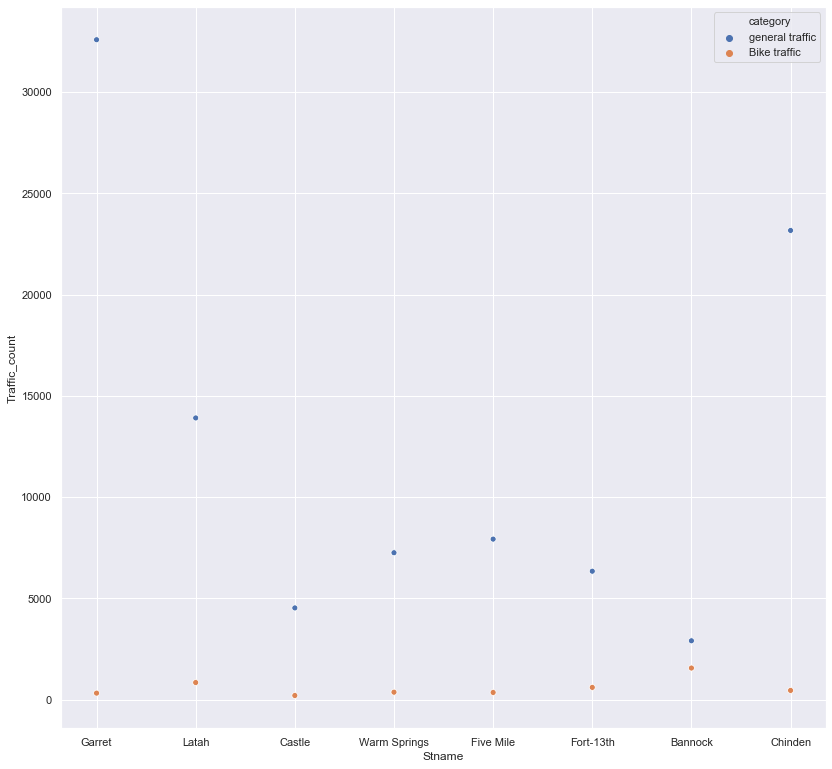

In [16]:
sns.set(rc={'figure.figsize':(13.7,13.27)})
w = sns.scatterplot(x='Stname',y='Traffic_count',hue='category',data =final_df)
#w.savefig(r'C:\Users\Admini\Desktop\TVCA2\TVCA\orig-data\fig1.png')



**Inferences:**

- For Bannock street, the decrease in general traffic positively resulted in an increase in bike traffic.
- The same trend is not seen for Fort or Latah street.Therefore we can conclude general traffic doesn't influence bike traffic.
- Latah street doesn't have enough data points at this point of time compared to Bannock.
- There are some hidden factors that influence bike traffic.For example, speed limit of a street, Directions.


**Directions:**

Let us see, how does the bike traffic change when directions are taken in to account.


In [17]:
bike_dir = pd.read_csv('clean-data/Gen_traf_analysis_data/directions.csv')
bike_dir.head()

,Unnamed: 0,Location,Date,Time,Total: Location 1,Total: Location 2
0,1,08th / Bannock,9/14/2010,PM,133.0,134
1,2,08th / Fort,9/15/2010,PM,72.0,60
2,3,08th / Greenbelt,9/14/2010,PM,64.0,206
3,5,08th / River,9/15/2010,PM,214.0,38
4,6,10th / Bannock,9/15/2010,PM,68.0,107


In [18]:
bike_dir_sum = bike_dir.groupby('Location')['Total: Location 1','Total: Location 2'].sum().reset_index()
bike_dir_sum.head()

,Location,Total: Location 1,Total: Location 2
0,03rd / Bannock,21.0,31
1,03rd / Myrtle,458.0,122
2,05th / Idaho,13.0,15
3,06th / O'Farrell,45.0,17
4,06th / Union,216.0,94


In [19]:
split_1 = bike_dir_sum[['Location','Total: Location 1']]

In [20]:
split_2 = bike_dir_sum[['Location','Total: Location 2']]

In [21]:
df1 = split_1.rename(columns={'Total: Location 1' : 'bike_traffic'})
df2 = split_2.rename(columns={'Total: Location 2' : 'bike_traffic'})


In [22]:
#final_bike_dir.info()

In [23]:
df1['category']='N-S_direction'
df2['category']='E-W_direction'

In [24]:
df1.head()

,Location,bike_traffic,category
0,03rd / Bannock,21.0,N-S_direction
1,03rd / Myrtle,458.0,N-S_direction
2,05th / Idaho,13.0,N-S_direction
3,06th / O'Farrell,45.0,N-S_direction
4,06th / Union,216.0,N-S_direction


In [25]:
final_bike_dir=pd.concat([df1,df2])


In [26]:
dir_final_busy = pd.read_csv('clean-data/Gen_traf_analysis_data/dir_final_busy.csv')

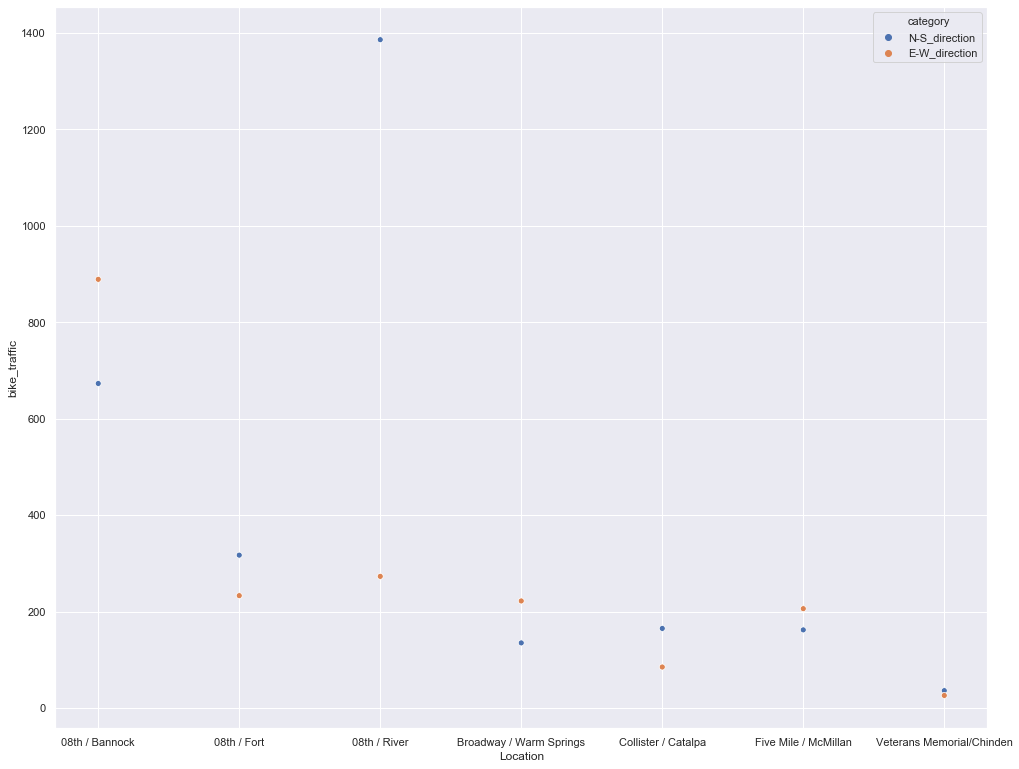

In [27]:

sns.set(rc={'figure.figsize':(16.7,13.27)})
sns.scatterplot(x="Location",y="bike_traffic",hue="category",data=dir_final_busy)


**Inference:**

- The skewed bike traffic at 08/Bannock and 08/River suggests that *the streets are more important to bikers than intersections.*
- The other intersection have almost equally distributed bike traffic in both the directions.